# An introduction to vector search
In this notebook, we're going to learn about vector search. Let's first install some libraries that we're going to use.

In [297]:
!pip install numpy scikit-learn plotly

## Creating vectors
Let's create some vectors to work with.

In [256]:
import numpy as np

In [351]:
vectors = np.random.randint(low=1, high=100, size=(20, 2), dtype='int32')
vectors[:5]

array([[35, 94],
       [70, 73],
       [63, 81],
       [17, 22],
       [13, 66]], dtype=int32)

In [303]:
import plotly.graph_objects as go

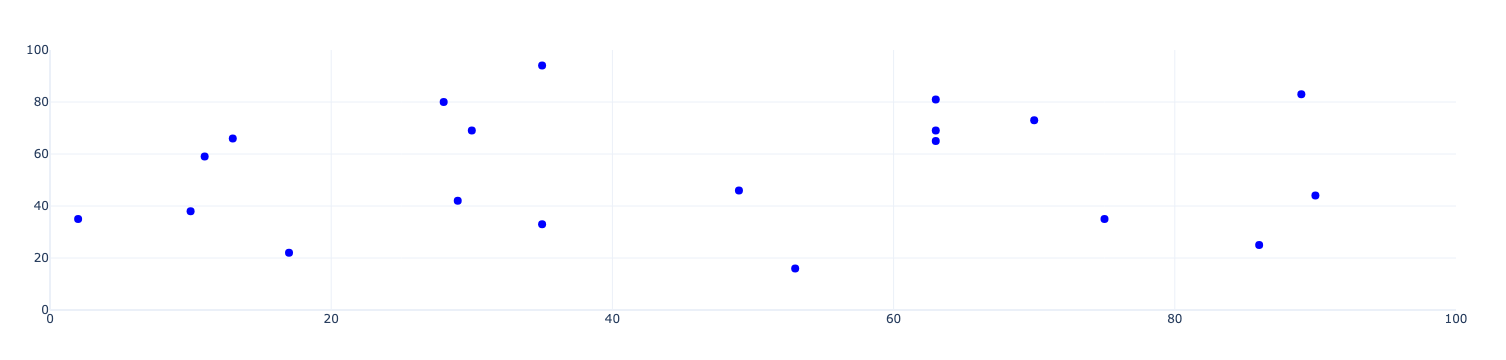

In [357]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=vectors[:, 0], y=vectors[:, 1], mode='markers', marker=dict(size=8, color='blue'), name="Data"))
fig.update_layout(template="plotly_white", margin=dict(t=50, b=50, l=50, r=50), xaxis=dict(range=[0, 100]),  yaxis=dict(range=[0, 100]))
fig

## Finding nearest neighbours
Next, we're going to use sk-learn to find the nearest neighbour for a search vector.

In [352]:
search_vector = np.array([[10,10]])

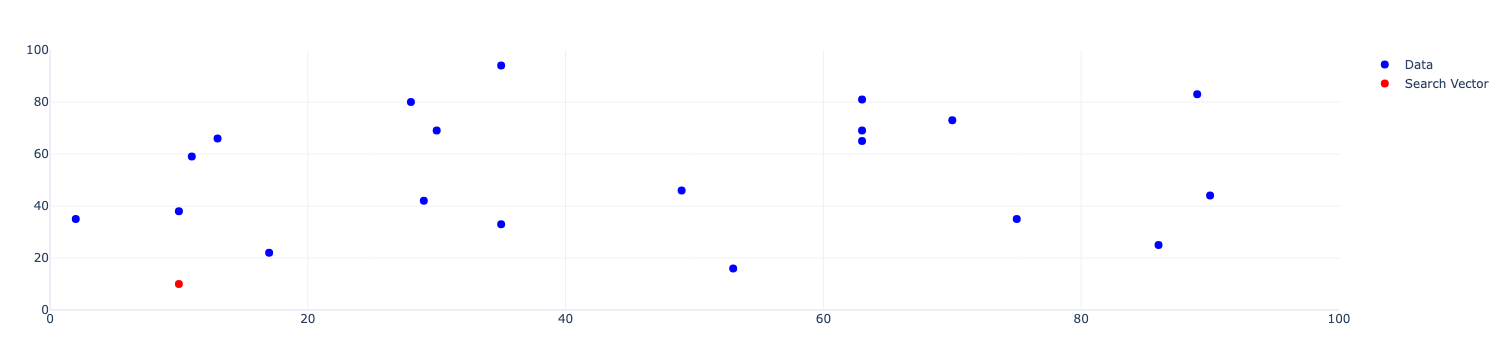

In [358]:
fig.add_trace(go.Scatter(x=search_vector[:, 0], y=search_vector[:, 1], mode='markers', marker=dict(size=8, color='red'), name="Search Vector"))
fig

In [423]:
from sklearn.neighbors import NearestNeighbors

In [371]:
nn = NearestNeighbors(algorithm="brute", metric="minkowski")
nbrs = nn.fit(vectors)

In [370]:
distances, indices = nbrs.kneighbors(search_vector, n_neighbors=3)

print("Distances:", distances)
print("Indices:", indices)

Distances: [[13.89244399 26.2488095  28.        ]]
Indices: [[3 6 9]]


In [367]:
for id, distance in zip(indices[0], distances[0]):
    print("Vector:", vectors[id])
    print("Distance:", distance)
    print("")

Vector: [63 65]
Distance: 0.00012204796530479456

Vector: [70 73]
Distance: 0.00021998704786929668

Vector: [35 33]
Distance: 0.0004322455356470245



## More and bigger vectors
Let's have a look what happens when we use more and bigger vectors.

In [413]:
dimensions = 64
number_of_vectors = 5_000_000
np.random.seed(1234)

vectors = np.random.randint(low=1, high=100_000, size=(number_of_vectors, dimensions), dtype='int32')

In [414]:
brute = NearestNeighbors(algorithm="brute", metric="minkowski")
brute_nbrs = brute.fit(vectors)

In [415]:
kd_tree = NearestNeighbors(algorithm="kd_tree", metric="minkowski")
kd_tree_nbrs = kd_tree.fit(vectors)

In [416]:
ball_tree = NearestNeighbors(algorithm="ball_tree", metric="minkowski")
ball_tree_nbrs = ball_tree.fit(vectors)

In [408]:
search_vector = np.random.randint(1, 100_000, (1, dimensions), dtype='int32')
search_vector

array([[78927, 26911, 56743, 49189, 97330,  3496, 47920, 96663, 58582,
        58202, 84876, 29009, 96529, 23806, 56383, 84376, 98582, 89644,
        43587, 89829, 54143, 59035, 43247, 89023,  2664, 55556, 11468,
        29498, 62271, 13399, 16332, 62956, 87384, 79874,  9943, 11286,
          413, 18927, 53528, 54834,  8282, 27065, 58250, 69146, 74114,
        75115, 81154, 82899, 36753, 40135, 76987, 22043, 98949, 35279,
        29095, 29223, 61633, 17708, 28906, 13081,  5668, 46335, 85657,
        74960]], dtype=int32)

In [400]:
import time
def nearest_neighbours(algorithm, number_of_neighbours):
    start = time.time()
    distances, indices = algorithm.kneighbors(search_vector, n_neighbors=number_of_neighbours)
    end = time.time()
    
    print("Time:", (end - start))
    print("")

    print("Results:")
    for id, distance in zip(indices[0], distances[0]):
        print("Vector:", vectors[id])
        print("Distance:", distance)
        print("")

In [417]:
nearest_neighbours(brute_nbrs, 3)

Time: 1.8325350284576416

Results:
Vector: [78927 26911 56743 49189 97330  3496 47920 96663 58582 58202 84876 29009
 96529 23806 56383 84376 98582 89644 43587 89829 54143 59035 43247 89023
  2664 55556 11468 29498 62271 13399 16332 62956 87384 79874  9943 11286
   413 18927 53528 54834  8282 27065 58250 69146 74114 75115 81154 82899
 36753 40135 76987 22043 98949 35279 29095 29223 61633 17708 28906 13081
  5668 46335 85657 74960]
Distance: 0.0

Vector: [64055 61818 92457 24928 72290   817 55188 45179 31395 76358 79877 26677
 75548 18032 33829 41415 93415 68202 15765 46538 58063 98257 41380 71880
  5890 64372  8151 79376 98491  5025 22790 67428 49702 44725 17008 18872
 12023 44978  6454 53861  2378  8409 67373 94321 98251 80935 77863 65270
  2666 54471 52780   540 88392 26346 19503 82477 81640 50341 38007 10330
 16657 55030 14491 31801]
Distance: 204035.10300190994

Vector: [44687 16549 29525 31218 52051  5911 53754 73389 14693 75804 83967 64991
 66865  5400 39569 96364 94071 84887 8536

In [418]:
nearest_neighbours(kd_tree_nbrs, 3)

Time: 1.047746181488037

Results:
Vector: [78927 26911 56743 49189 97330  3496 47920 96663 58582 58202 84876 29009
 96529 23806 56383 84376 98582 89644 43587 89829 54143 59035 43247 89023
  2664 55556 11468 29498 62271 13399 16332 62956 87384 79874  9943 11286
   413 18927 53528 54834  8282 27065 58250 69146 74114 75115 81154 82899
 36753 40135 76987 22043 98949 35279 29095 29223 61633 17708 28906 13081
  5668 46335 85657 74960]
Distance: 0.0

Vector: [64055 61818 92457 24928 72290   817 55188 45179 31395 76358 79877 26677
 75548 18032 33829 41415 93415 68202 15765 46538 58063 98257 41380 71880
  5890 64372  8151 79376 98491  5025 22790 67428 49702 44725 17008 18872
 12023 44978  6454 53861  2378  8409 67373 94321 98251 80935 77863 65270
  2666 54471 52780   540 88392 26346 19503 82477 81640 50341 38007 10330
 16657 55030 14491 31801]
Distance: 204035.10300190994

Vector: [44687 16549 29525 31218 52051  5911 53754 73389 14693 75804 83967 64991
 66865  5400 39569 96364 94071 84887 85367

In [419]:
nearest_neighbours(ball_tree_nbrs, 3)

Time: 0.9511430263519287

Results:
Vector: [78927 26911 56743 49189 97330  3496 47920 96663 58582 58202 84876 29009
 96529 23806 56383 84376 98582 89644 43587 89829 54143 59035 43247 89023
  2664 55556 11468 29498 62271 13399 16332 62956 87384 79874  9943 11286
   413 18927 53528 54834  8282 27065 58250 69146 74114 75115 81154 82899
 36753 40135 76987 22043 98949 35279 29095 29223 61633 17708 28906 13081
  5668 46335 85657 74960]
Distance: 0.0

Vector: [64055 61818 92457 24928 72290   817 55188 45179 31395 76358 79877 26677
 75548 18032 33829 41415 93415 68202 15765 46538 58063 98257 41380 71880
  5890 64372  8151 79376 98491  5025 22790 67428 49702 44725 17008 18872
 12023 44978  6454 53861  2378  8409 67373 94321 98251 80935 77863 65270
  2666 54471 52780   540 88392 26346 19503 82477 81640 50341 38007 10330
 16657 55030 14491 31801]
Distance: 204035.10300190994

Vector: [44687 16549 29525 31218 52051  5911 53754 73389 14693 75804 83967 64991
 66865  5400 39569 96364 94071 84887 8536